OBJECTIVE: To create a classification model that can predict whether or not a person has the presence of heart disease based on that person's physical characteristics (age, sex, cholesterol, etc.).
This database contains 14 physical attributes based on a patient's physical test(age,sex,cp(chest pain),chol(taux de cholesterol),fbs(fasting blood sugar),restecg(elettrocardiografica),thalach(freq card max),exang(angina pot. a l effort),oldpeak(depressione del c),slope(pente del c lavoro f),ca(n d tub),thal(3=normal;6=default fix,7=reversible default),target(1=desease,0=no desease).
from:https://archive.ics.uci.edu/ml/datasets/Heart+Disease


In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay



In [32]:
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/heart.csv'
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
#controllo il tipo dei miei dati(numero di colonni e line)e dtype(int,float,str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [34]:
#controllo del valore manchanti
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [35]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [36]:
#df.describe(include='object')

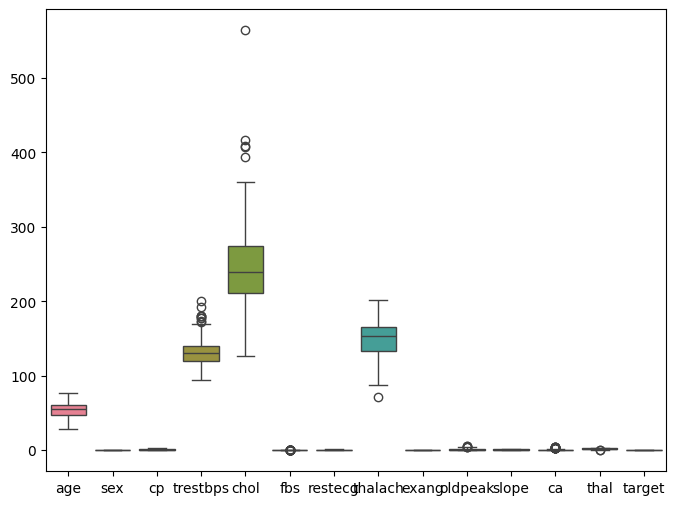

In [37]:
#analisi descrittivi
plt.figure(figsize=(8, 6))
sns.boxplot(data=df,legend='auto');

In [ ]:
#ANALISI UNIVARIATA

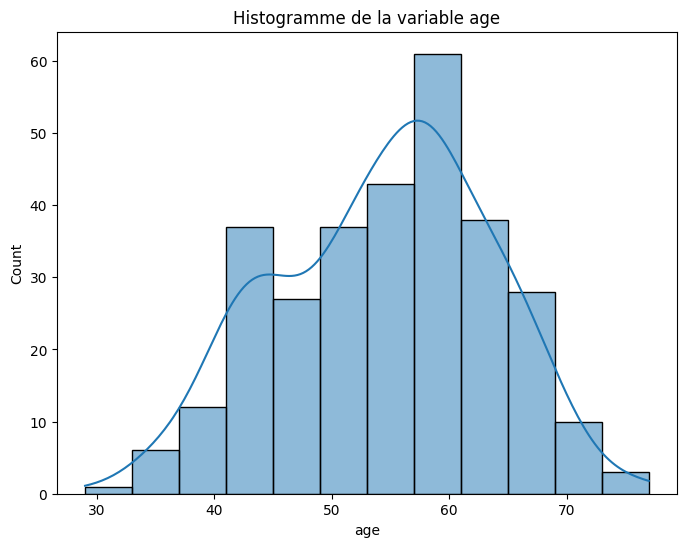

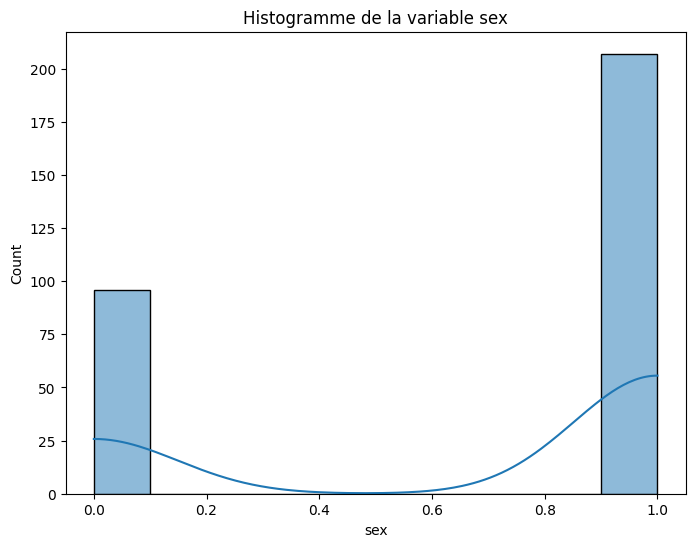

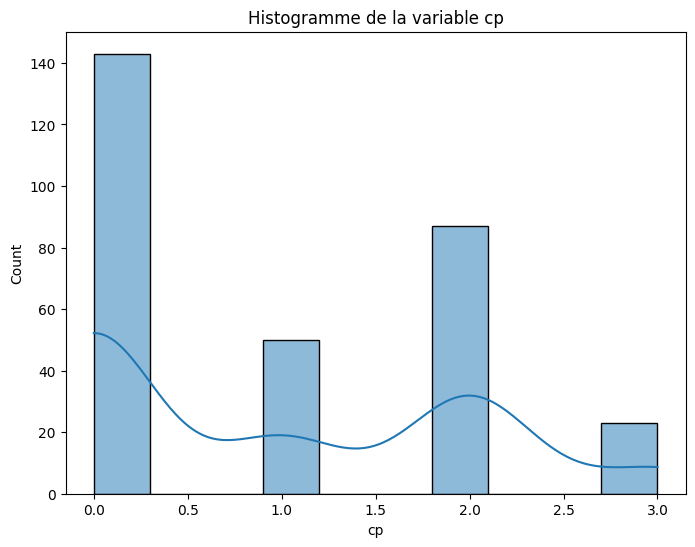

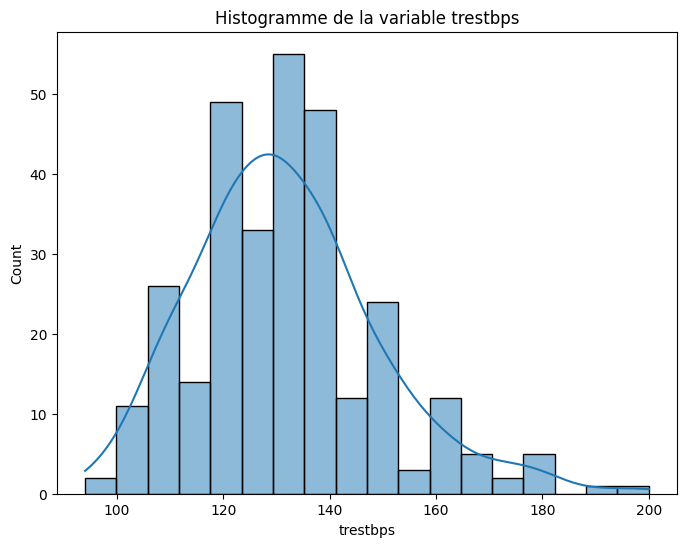

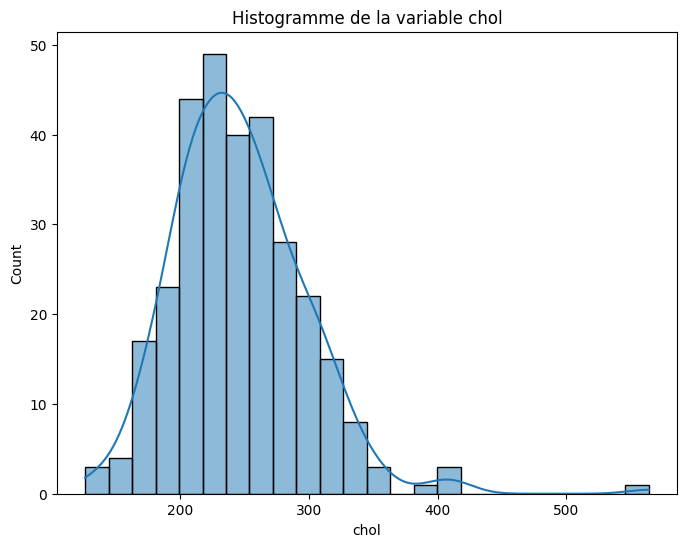

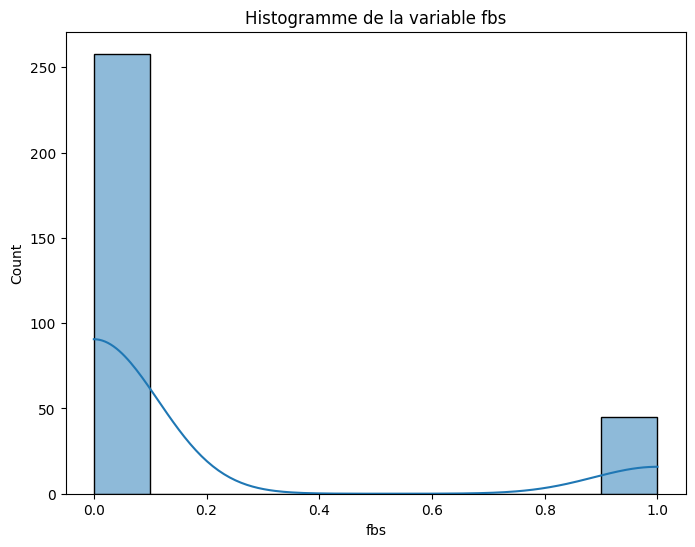

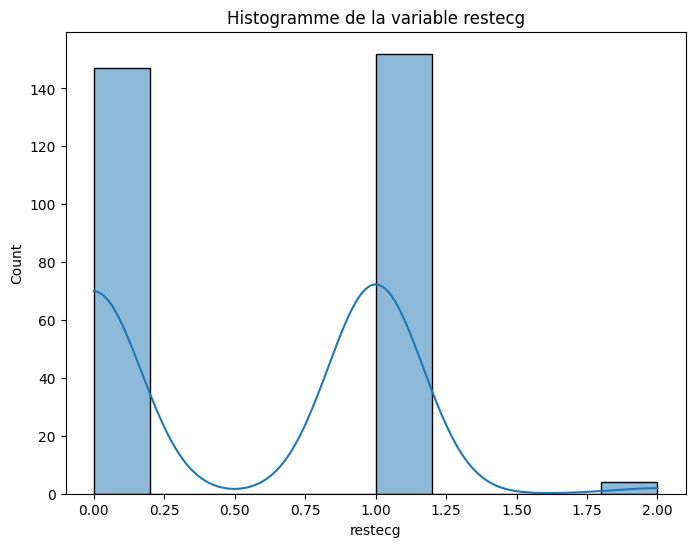

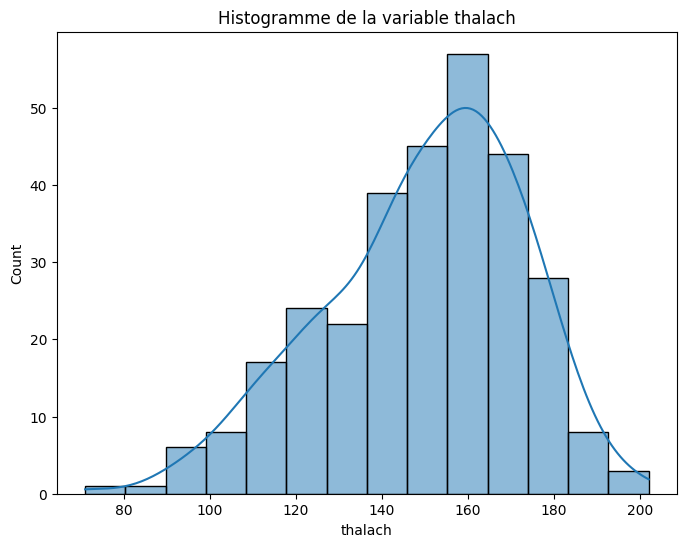

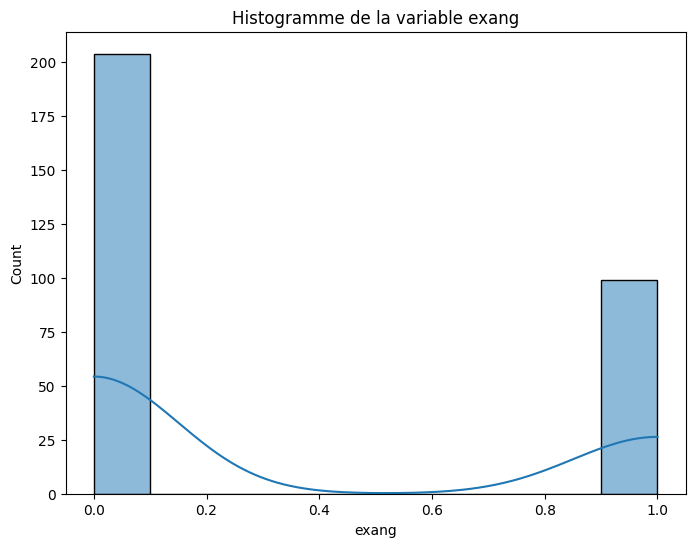

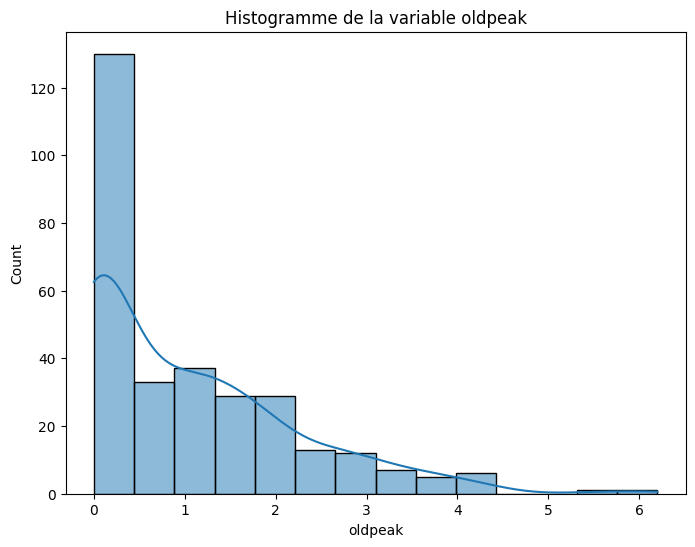

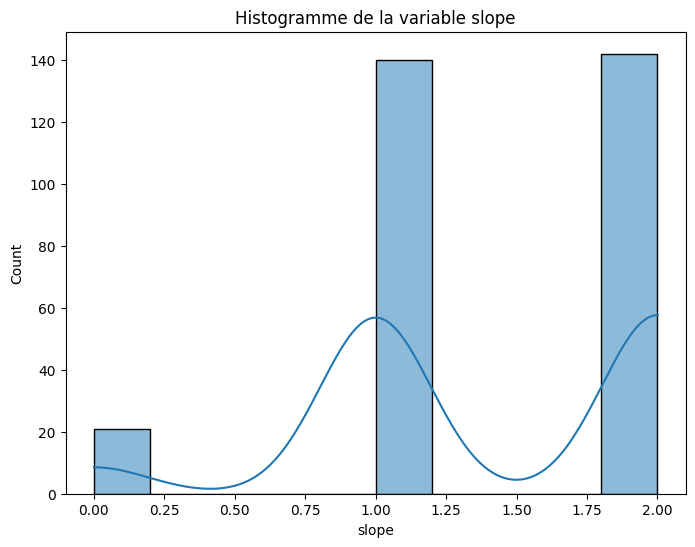

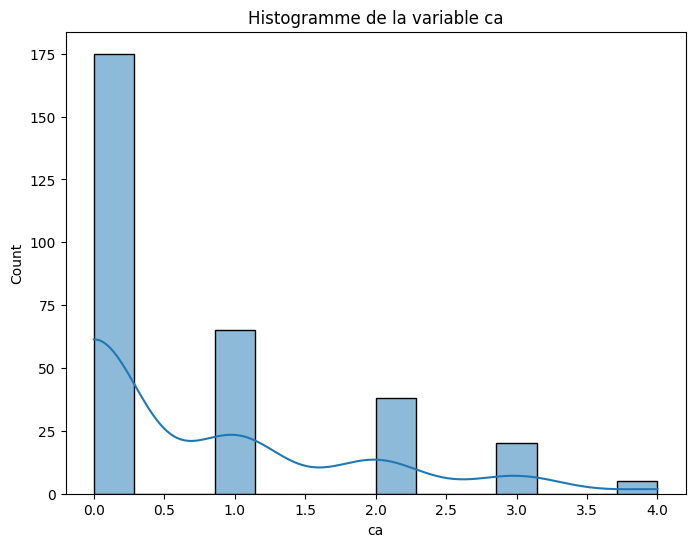

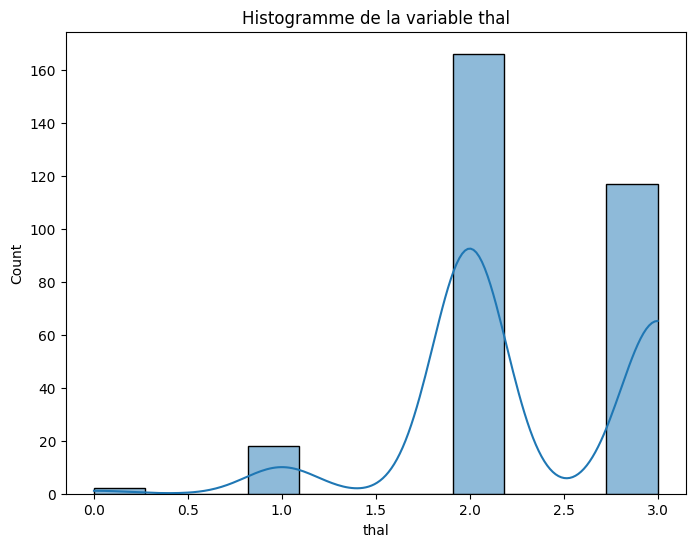

In [38]:
#visualizzasione dei dati pairplot
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

#statistic,p_value = stats.normaltest(df[column])
#if p_value < 0.05:
#print(f"La variable {column} ne suit pas une loi normale (p-value={p_value})")
#else:
#print(f"La variable {column} suit une loi normale (p-value={p_value})")

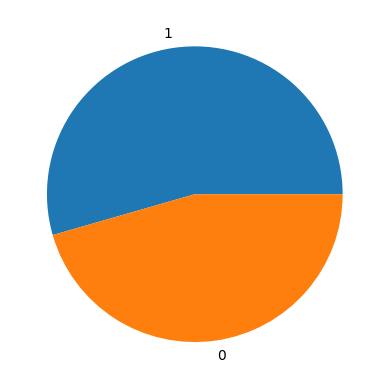

In [62]:
#esplorazione grafica la frequenza dei sani e malati.
freq_table = (df['target'].value_counts())/len(df)
plt.pie(freq_table,labels=freq_table.index);

In [ ]:
#ANALISI BIVARIATA

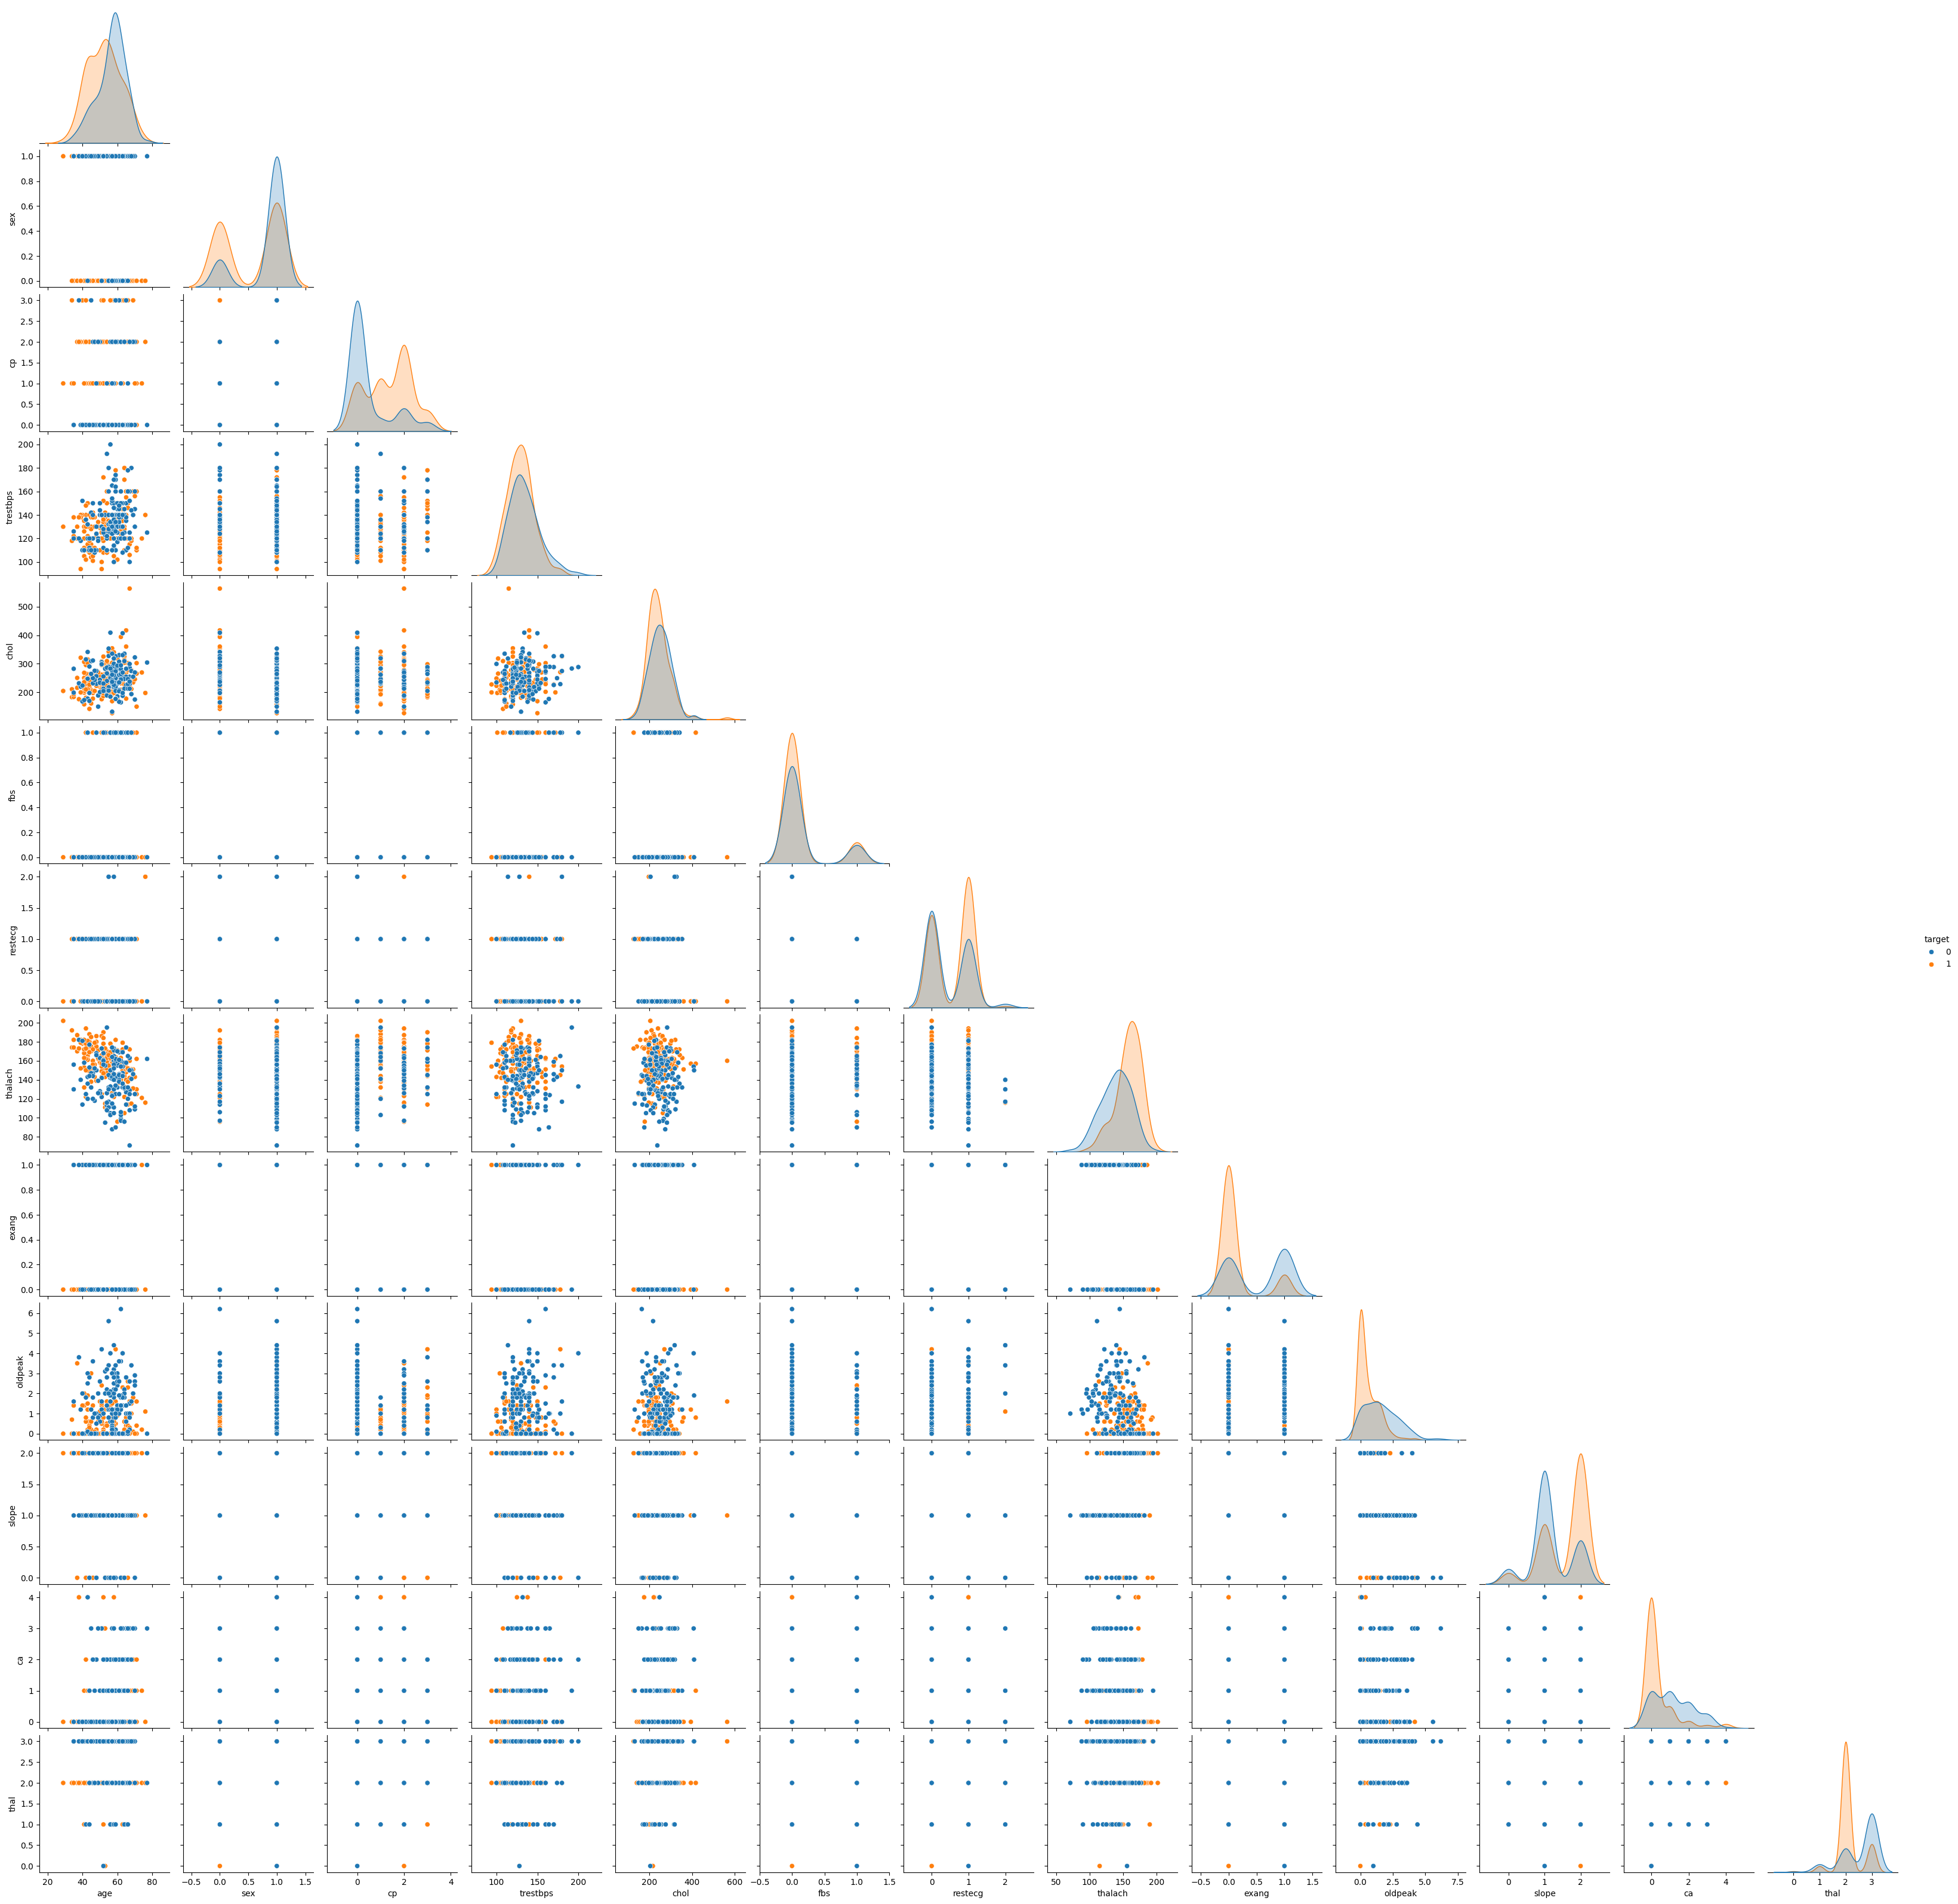

In [65]:
sns.pairplot(df,hue='target',corner=True);

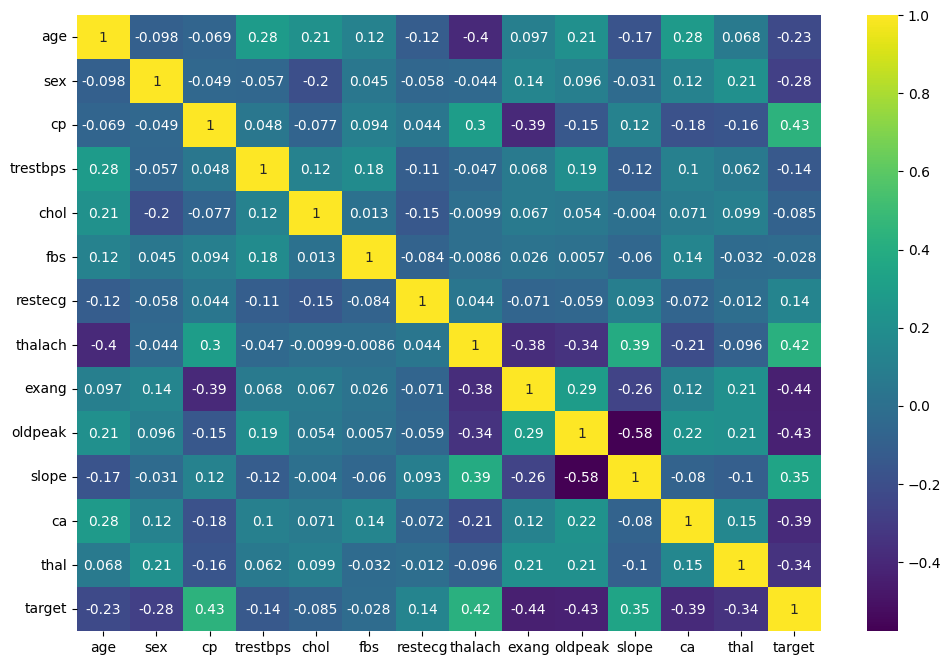

In [66]:
#heatmap per osservare la correlazzione tra dati
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True);

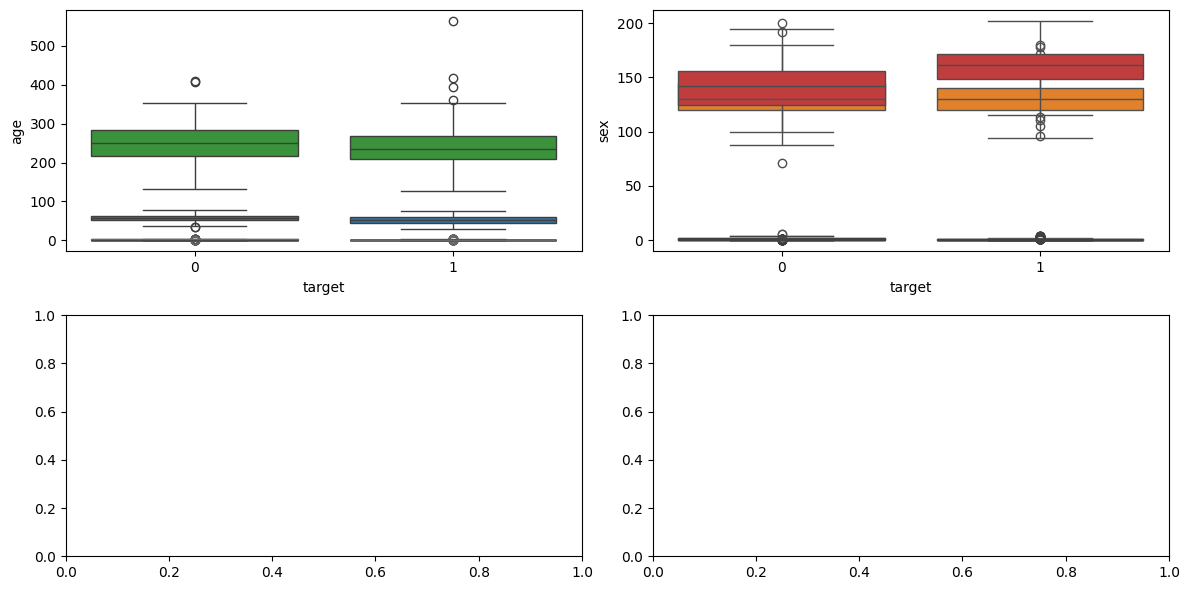

In [74]:
#analisi dei variabili e lo stato di salute del malato(target)

# Costruzione dei boxplots per ogni vaviabilità dipendente dello stato di salute
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(12,6))
row = 0
col = 0
for i in range(len(df.columns) -1):
    if col > 1:
        row += 0
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['target'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

In [ ]:
#ANALISI MULTIVARIABILI(USANDO ACP)

In [75]:
# Importation des packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [76]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
# Réduction of dimension
pca = PCA()
X_pca=pca.fit_transform(X)

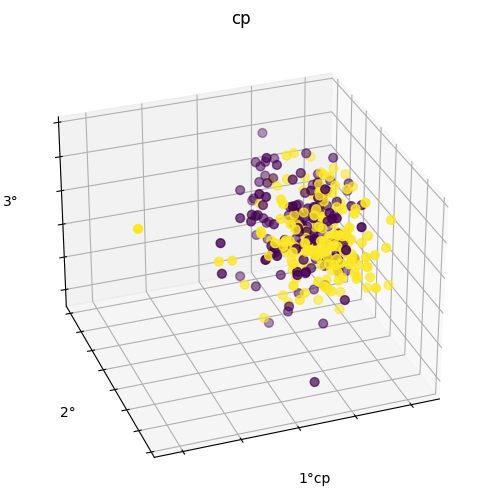

In [85]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(df)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
     c=df.target,
    s=40,
)

ax.set_title("cp")
ax.set_xlabel("1°cp")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2°")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3°")
ax.zaxis.set_ticklabels([])
plt.show()



In [ ]:
#prediction

**Train | Test Split et Scaling**

In [42]:
X = df.drop('target',axis=1)
y = df['target']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [44]:
X_train.shape

(272, 13)

In [45]:
y_train.shape

(272,)

In [46]:
X_test.shape

(31, 13)

In [47]:
y_test.shape

(31,)

In [48]:
scaler = StandardScaler()
scaled_X_train =scaler.fit_transform(X_train)
scaled_X_test =scaler.transform(X_test)

In [49]:
#LogisticRegression
log_model = LogisticRegressionCV()
log_model.fit(scaled_X_train,y_train)
log_model.C_

array([2.7825594])

In [50]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [51]:
log_model.coef_

array([[-0.13302166, -0.82983661,  0.91833004, -0.31568785, -0.22018504,
         0.04466928,  0.25689156,  0.41657407, -0.53020481, -0.65248971,
         0.500581  , -0.86278117, -0.56212767]])

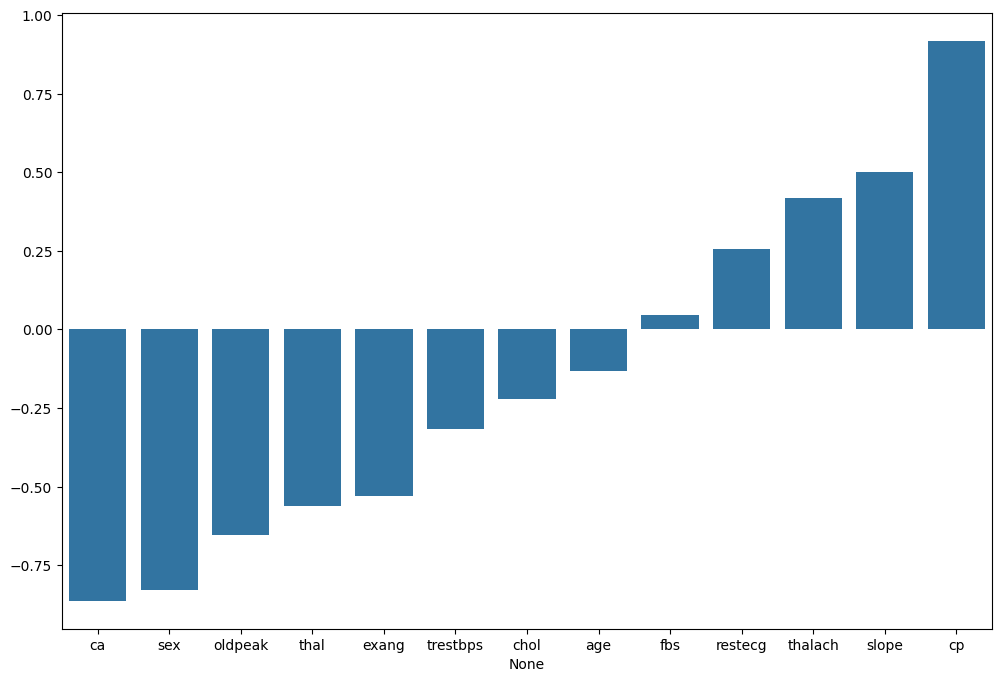

In [52]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])
coefs = coefs.sort_values()
plt.figure(figsize=(12,8))
sns.barplot(x=coefs.index,y=coefs.values);

In [53]:
#MODEL PERFORMANCE EVALUATION

In [54]:
y_pred = log_model.predict(scaled_X_test)
confusion_matrix(y_test,y_pred)


array([[11,  3],
       [ 3, 14]])

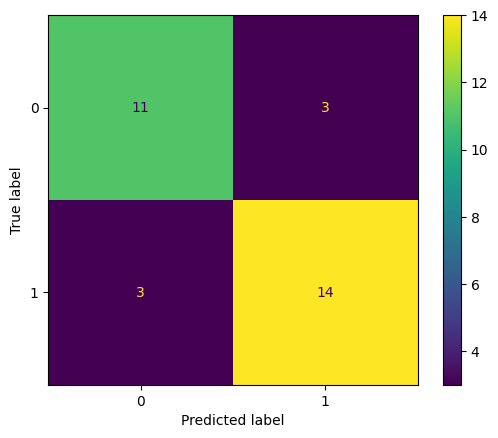

In [55]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test);

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.82      0.82      0.82        17

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31



In [57]:
accuracy_score(y_test, y_pred)

0.8064516129032258

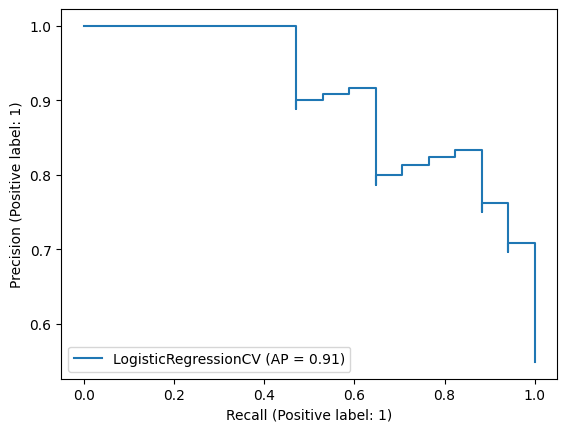

In [58]:
PrecisionRecallDisplay.from_estimator(log_model,scaled_X_test,y_test);

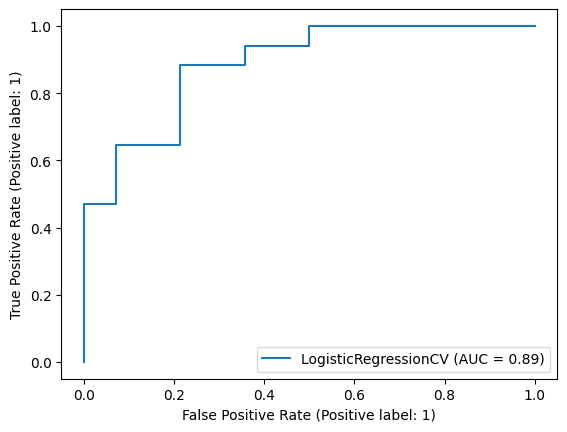

In [59]:
RocCurveDisplay.from_estimator(log_model,scaled_X_test,y_test);

cosa succederà sul futuro malato

In [60]:
X_test.iloc[-1]



age          64.0
sex           1.0
cp            0.0
trestbps    128.0
chol        263.0
fbs           0.0
restecg       1.0
thalach     105.0
exang         1.0
oldpeak       0.2
slope         1.0
ca            1.0
thal          3.0
Name: 139, dtype: float64

In [61]:
y_test.iloc[-1]
#quindi, malato

1

by :
Dottore AZEMFACK PAGES &
Dottore TEDAH DONALD